In [55]:
%matplotlib inline
import pandas
traindata = pandas.read_csv("Training Data.csv")
#db.describe
traindata.columns

Index(['ID', 'Months since Last Donation', 'Number of Donations',
       'Months since First Donation', 'Donation per Month',
       'Month per Donation', 'Made Donation in March 2007'],
      dtype='object')

In [56]:
testdata = pandas.read_csv("Test Data.csv")
testdata.columns

Index(['ID', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Prediction'],
      dtype='object')

In [57]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import linear_model

In [58]:
#getting data sets
X_train = traindata[['Months since Last Donation','Number of Donations','Months since First Donation']]
#X_train = traindata[['Donation per Month']]
Y_train = traindata['Made Donation in March 2007']
X_test = testdata[['Months since Last Donation','Number of Donations','Months since First Donation']]
Y_test = testdata['Prediction']

In [59]:
X_train = X_train.as_matrix().astype(np.float)
X_test = X_test.as_matrix().astype(np.float)
Y_train = Y_train.as_matrix().astype(np.float)
Y_test = Y_test.as_matrix().astype(np.float)

In [60]:
LRmodel = linear_model.LogisticRegression()
LRmodel = LRmodel.fit(X_train, Y_train)

In [61]:
#check the accuracy of the regression
LRmodel.score(X_train, Y_train)

0.76388888888888884

In [62]:
from sklearn.metrics import confusion_matrix


In [63]:
#check the null error rate
#only 24 percent of people donated in March, 2007, which means you can simply get a 76 percent 
#accuracy just by saying no. 
#trying to predict
Y_train.mean()
1-Y_train.mean()

0.76041666666666663

In [64]:
LRpredict = LRmodel.predict_proba(X_test)
#print(predict)

In [65]:
import pandas as pd
import numpy as np
LRsolution = pd.DataFrame(testdata['ID'])
LRnp_values = np.array(LRpredict,dtype = np.float)
solution['LRprobs'] = LRnp_values[:,1]
solution.to_csv("LRoutput.csv",index=False)

In [66]:
LRmatrix=confusion_matrix(Y_train,LRmodel.predict(X_train))

[[425  13]
 [123  15]]


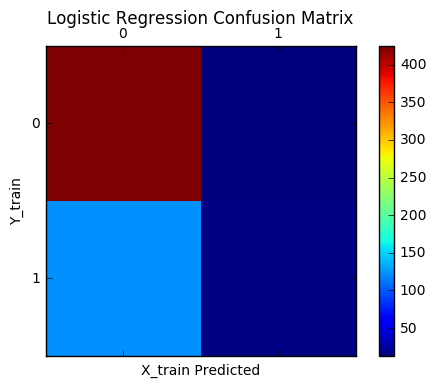

In [67]:
import pylab as pl
labels = ['0', '1']
print(LRmatrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(LRmatrix)
pl.title('Logistic Regression Confusion Matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
pl.xlabel('X_train Predicted')
pl.ylabel('Y_train')
pl.show()

In [68]:
LRprobsTest = LRmodel.predict_proba(X_train)
#print(LRprobs)
from sklearn.metrics import roc_curve, auc

In [69]:
LRtrainprobs = LRmodel.predict_proba(X_train)
def print_roc_probas(name, probs, ytest):
    fpr, tpr, thresholds = roc_curve(ytest, probs[::,1])

    roc_auc = auc(fpr, tpr)
    print (roc_auc)
    plt.clf()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name)
    plt.show()
    

0.748792270531


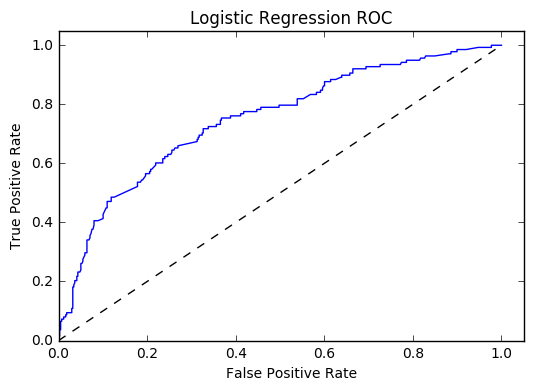

In [70]:
print_roc_probas("Logistic Regression ROC",LRprobsTest, Y_train)

In [71]:
#print (metrics.accuracy_score(Y_test, predict))
#print (metrics.roc_auc_score(Y_test, probs[:, 1]))

In [72]:
# evaluate the model using 10-fold cross-validation
LRscores = cross_val_score(LogisticRegression(), X_train, Y_train, scoring='accuracy', cv=10)
print (LRscores)
print (LRscores.mean())

[ 0.72413793  0.75862069  0.77586207  0.75862069  0.74137931  0.75862069
  0.70689655  0.77586207  0.76785714  0.76785714]
0.753571428571


In [73]:
#we got a 75.4 percent accuracy 


In [74]:
#Try log lost for Logistic Regression with X_train and Y_train
LRprobsTest = LRmodel.predict_proba(X_train)
print(LRprobsTest)

[[  2.09479723e-02   9.79052028e-01]
 [  3.57875440e-01   6.42124560e-01]
 [  3.21565742e-01   6.78434258e-01]
 ..., 
 [  9.61746869e-01   3.82531313e-02]
 [  9.91558164e-01   8.44183580e-03]
 [  9.99782554e-01   2.17445763e-04]]


In [75]:
#log loss for Random Forest
metrics.log_loss(Y_train, LRprobsTest)

0.48318098826630723

In [76]:
#now for random forest
import sklearn.ensemble as sk
rfc = sk.RandomForestClassifier(n_estimators=500, oob_score=True)
RFmodel = rfc.fit(X_train, Y_train)

In [77]:
rfc.oob_score_

0.73784722222222221

In [78]:
RFmodel.score(X_train, Y_train)

0.9375

In [79]:
RFpredict = RFmodel.predict(X_test)
print(RFpredict)

[ 1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.
  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


In [80]:
RFprobs = RFmodel.predict_proba(X_test)
print(RFprobs)

[[ 0.27483333  0.72516667]
 [ 0.93        0.07      ]
 [ 0.90771803  0.09228197]
 [ 0.906       0.094     ]
 [ 0.51383333  0.48616667]
 [ 0.3185      0.6815    ]
 [ 0.67012893  0.32987107]
 [ 1.          0.        ]
 [ 0.98        0.02      ]
 [ 0.998       0.002     ]
 [ 0.23904675  0.76095325]
 [ 0.964       0.036     ]
 [ 0.812       0.188     ]
 [ 0.90771803  0.09228197]
 [ 0.21511111  0.78488889]
 [ 0.77166416  0.22833584]
 [ 0.9812      0.0188    ]
 [ 0.456       0.544     ]
 [ 0.89        0.11      ]
 [ 0.79646667  0.20353333]
 [ 0.05625714  0.94374286]
 [ 0.46942857  0.53057143]
 [ 0.59933333  0.40066667]
 [ 0.90771803  0.09228197]
 [ 0.94        0.06      ]
 [ 0.79        0.21      ]
 [ 0.58015029  0.41984971]
 [ 1.          0.        ]
 [ 0.958       0.042     ]
 [ 0.27483333  0.72516667]
 [ 0.84        0.16      ]
 [ 0.674       0.326     ]
 [ 0.817493    0.182507  ]
 [ 0.936       0.064     ]
 [ 0.875       0.125     ]
 [ 0.98633333  0.01366667]
 [ 0.92375     0.07625   ]
 

In [98]:
RFprobsTest = RFmodel.predict_proba(X_train)
print(RFprobsTest)

[[ 0.208       0.792     ]
 [ 0.276       0.724     ]
 [ 0.264       0.736     ]
 ..., 
 [ 0.99666667  0.00333333]
 [ 0.95532963  0.04467037]
 [ 0.9954      0.0046    ]]


In [100]:
RFpredict = RFmodel.predict_proba(X_test)

In [102]:
RFpredict = RFmodel.predict_proba(X_test)
import pandas as pd
import numpy as np
RFsolution = pd.DataFrame(testdata['ID'])
RFnp_values = np.array(RFpredict,dtype = np.float)
solution['RFprobs'] = RFnp_values[:,1]
solution.to_csv("RFoutput.csv",index=False)

In [82]:
RFmatrix=confusion_matrix(Y_train,RFmodel.predict(X_train))

[[432   6]
 [ 30 108]]


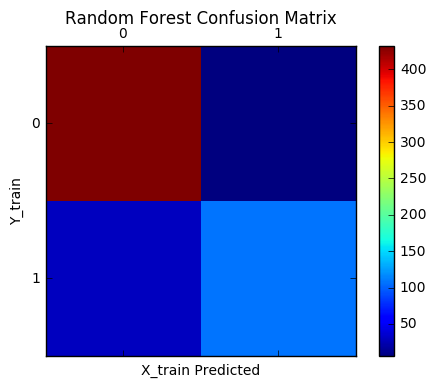

In [83]:
import pylab as pl
labels = ['0', '1']
print(RFmatrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(RFmatrix)
pl.title('Random Forest Confusion Matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
pl.xlabel('X_train Predicted')
pl.ylabel('Y_train')
pl.show()

0.972172589504


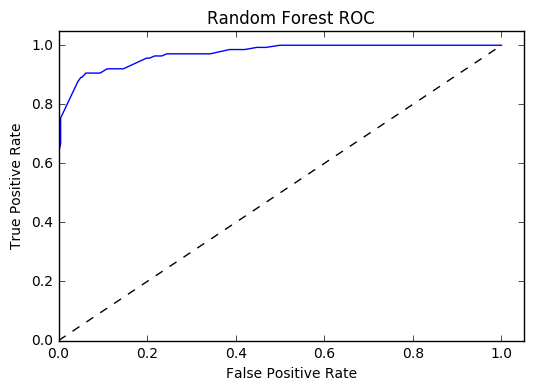

In [84]:
print_roc_probas("Random Forest ROC",RFprobsTest, Y_train)

In [85]:
#log loss for Random Forest
metrics.log_loss(Y_train, RFprobsTest)

0.20679471440380848

In [86]:
#k-nearest neighbors
from sklearn import neighbors

In [87]:
KNmodel = neighbors.KNeighborsClassifier()
KNmodel = KNmodel.fit(X_train, Y_train)
KNmodel.score(X_train, Y_train)

0.828125

In [88]:
KNprobs = KNmodel.predict_proba(X_test)
#metrics.log_loss(Y_train, probs4)
print(KNprobs)

[[ 0.4  0.6]
 [ 1.   0. ]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 0.6  0.4]
 [ 0.2  0.8]
 [ 0.6  0.4]
 [ 1.   0. ]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 0.4  0.6]
 [ 1.   0. ]
 [ 0.8  0.2]
 [ 0.8  0.2]
 [ 0.4  0.6]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 0.2  0.8]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.2  0.8]
 [ 0.4  0.6]
 [ 0.6  0.4]
 [ 0.8  0.2]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 0.6  0.4]
 [ 1.   0. ]
 [ 0.6  0.4]
 [ 0.4  0.6]
 [ 1.   0. ]
 [ 0.8  0.2]
 [ 0.8  0.2]
 [ 0.8  0.2]
 [ 0.6  0.4]
 [ 1.   0. ]
 [ 0.6  0.4]
 [ 1.   0. ]
 [ 0.6  0.4]
 [ 0.8  0.2]
 [ 0.4  0.6]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 0.6  0.4]
 [ 0.8  0.2]
 [ 0.8  0.2]
 [ 0.4  0.6]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 0.8  0.2]
 [ 0.8  0.2]
 [ 0.6  0.4]
 [ 0.6  0.4]
 [ 0.4  0.6]
 [ 1.   0. ]
 [ 0.6  0.4]
 [ 1.   0. ]
 [ 0.4  0.6]
 [ 0.6  0.4]
 [ 0.8  0.2]
 [ 0.8  0.2]
 [ 0.6  0.4]
 [ 0.6  0.4]
 [ 0.8  0.2]
 [ 0.6  0.4]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.8  0.2]
 [ 0.4  0.6]
 [ 0.8  0.2]
 [ 0.8  0.2]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 0.8  0.2]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 0.8  0.2]

In [89]:
KNprobsTest = KNmodel.predict_proba(X_train)
print(RFprobsTest)

[[ 0.208       0.792     ]
 [ 0.276       0.724     ]
 [ 0.264       0.736     ]
 ..., 
 [ 0.99666667  0.00333333]
 [ 0.95532963  0.04467037]
 [ 0.9954      0.0046    ]]


In [103]:
KNpredict = KNmodel.predict_proba(X_test)
import pandas as pd
import numpy as np
KNsolution = pd.DataFrame(testdata['ID'])
KNnp_values = np.array(KNpredict,dtype = np.float)
solution['KNprobs'] = KNnp_values[:,1]
solution.to_csv("KNoutput.csv",index=False)

In [90]:
KNmatrix=confusion_matrix(Y_train,KNmodel.predict(X_train))

[[414  24]
 [ 75  63]]


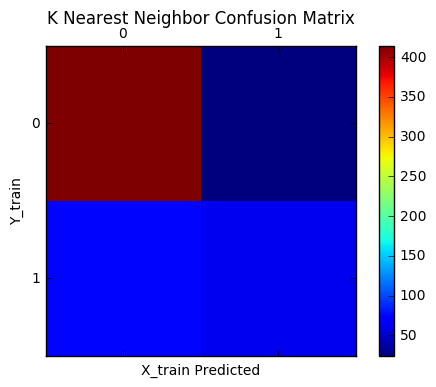

In [91]:
import pylab as pl
labels = ['0', '1']
print(KNmatrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(KNmatrix)
pl.title('K Nearest Neighbor Confusion Matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
pl.xlabel('X_train Predicted')
pl.ylabel('Y_train')
pl.show()

0.845063198994


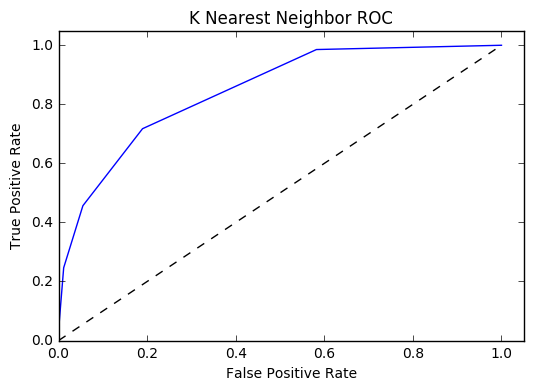

In [92]:
print_roc_probas("K Nearest Neighbor ROC",KNprobsTest, Y_train)

In [93]:
metrics.log_loss(Y_train, KNprobsTest)

0.48068479873384656